
## Regression in Python: Exploratory Data Analysis for Linear Relationships
# Predicting Prices of Boston Housing Values

**This is an Exploratory Data Analysis utlizing some basic statistical concepts:** 

* Linear Regression Models
* Prediction using Linear Regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. 

In [1]:
import scipy.stats as stats
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

## Load and Asess the Boston Housing data set from `sklearn`
This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

sklearn.utils.Bunch

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
#boston.data

In [5]:
#boston.target

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston.filename

'D:\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [8]:
boston.data.shape

(506, 13)

In [9]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Describing the Data Set

In [10]:
#print(boston.DESCR)

## Setting up our Housing Data for Linear Regression Analysis
#### Create a DataFrame `bos` containing all the data to use in predicting Boston Housing prices.  

In [11]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Create a variable called `PRICE` which will contain the prices. 
#### This information is contained in the `target` data, what we want to predict using the linear model.

In [12]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Summary Statistics
#### Exploring this data set.  First, use `describe()` to get basic summary statistics for each of the columns. 

In [13]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Building the Regression Model

## Step 1: Checking for Linearity - Scatterplots
#### Using scatter plots, let's take a look into the relationships between the variables and price.  In order to create a linear model, the predictors or features that we use must have a linear relationship to price. 

### Strong Possible Predictors:
These features have string relationships to price exemplified by a small, tight distribution of data around the line of best fit extimated by the plot.

#### Number of Rooms
Strong positive coorelation, as the number of rooms increase/decrease, the housing price increases/decreases

<IPython.core.display.Javascript object>


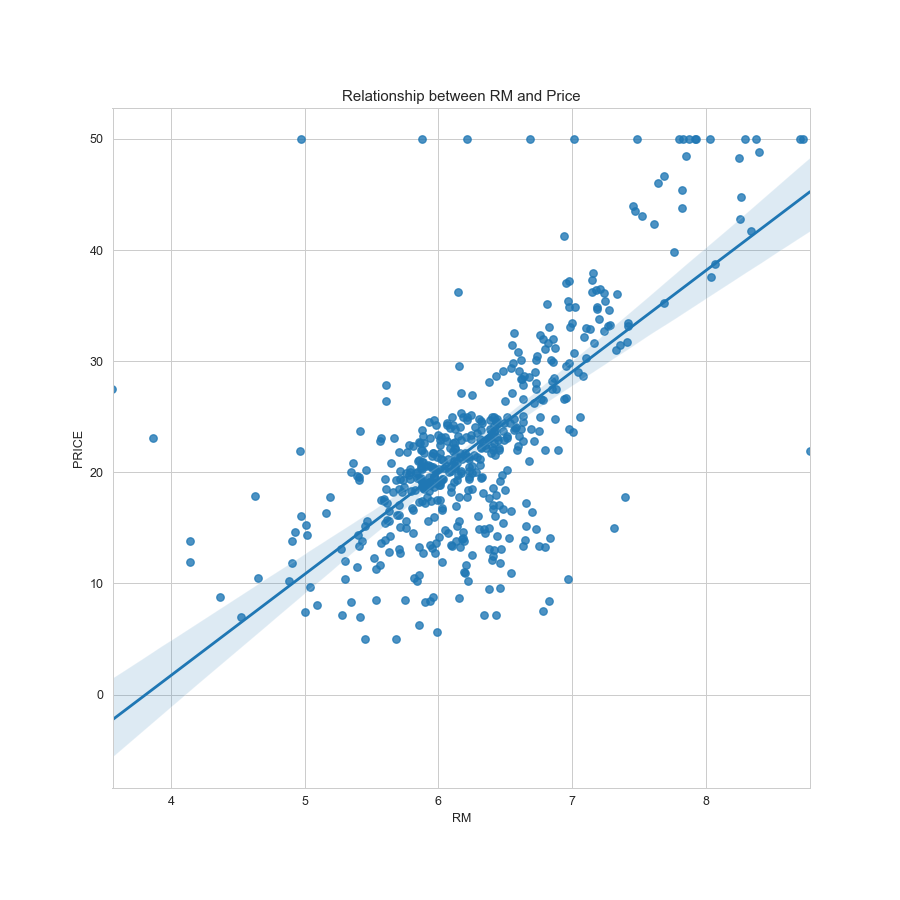

Text(0.5, 1.0, 'Relationship between RM and Price')

In [14]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.title("Relationship between RM and Price")

#### % of Lower Status Population 
Strong negative coorelation, the more/less the population consists of lower status individuals,housing price decreases/increases.

<IPython.core.display.Javascript object>


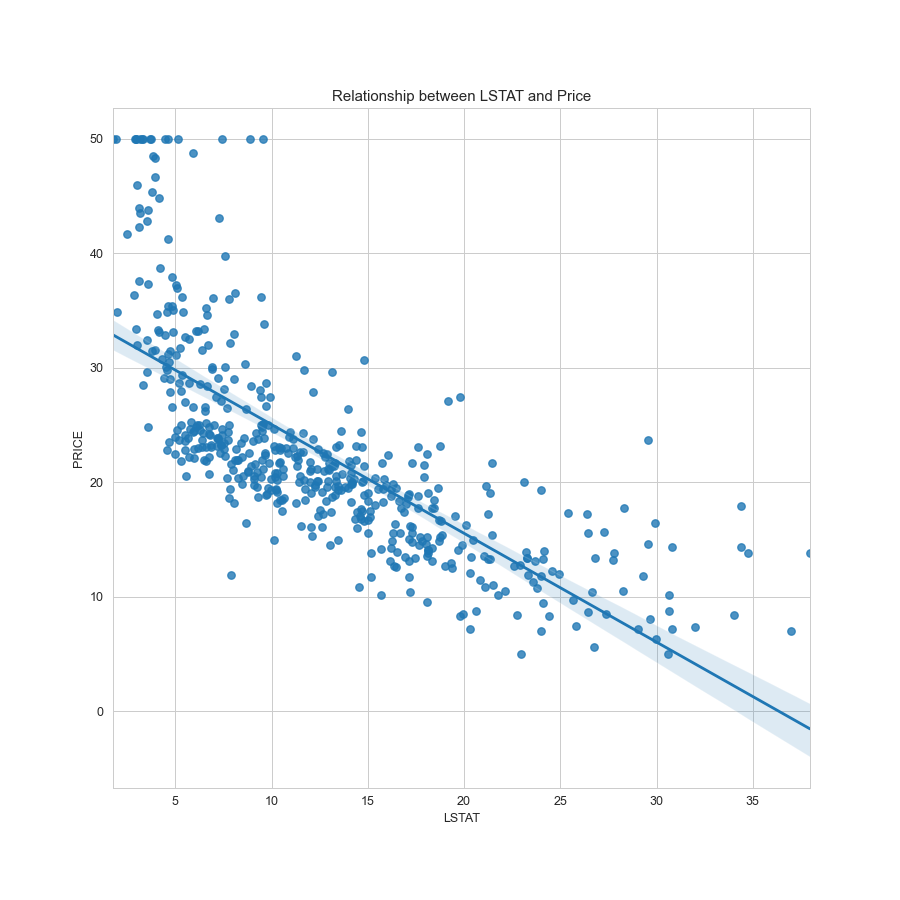

Text(0.5, 1.0, 'Relationship between LSTAT and Price')

In [15]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.regplot(y="PRICE", x="LSTAT", data=bos, fit_reg = True)
plt.title("Relationship between LSTAT and Price")

#### Nitrus Oxide Concentration (in parts per 10 million)
Strong negative coorelation, the more/less concentrated NOX is in the air, the lower/higher the price of housing.

<IPython.core.display.Javascript object>


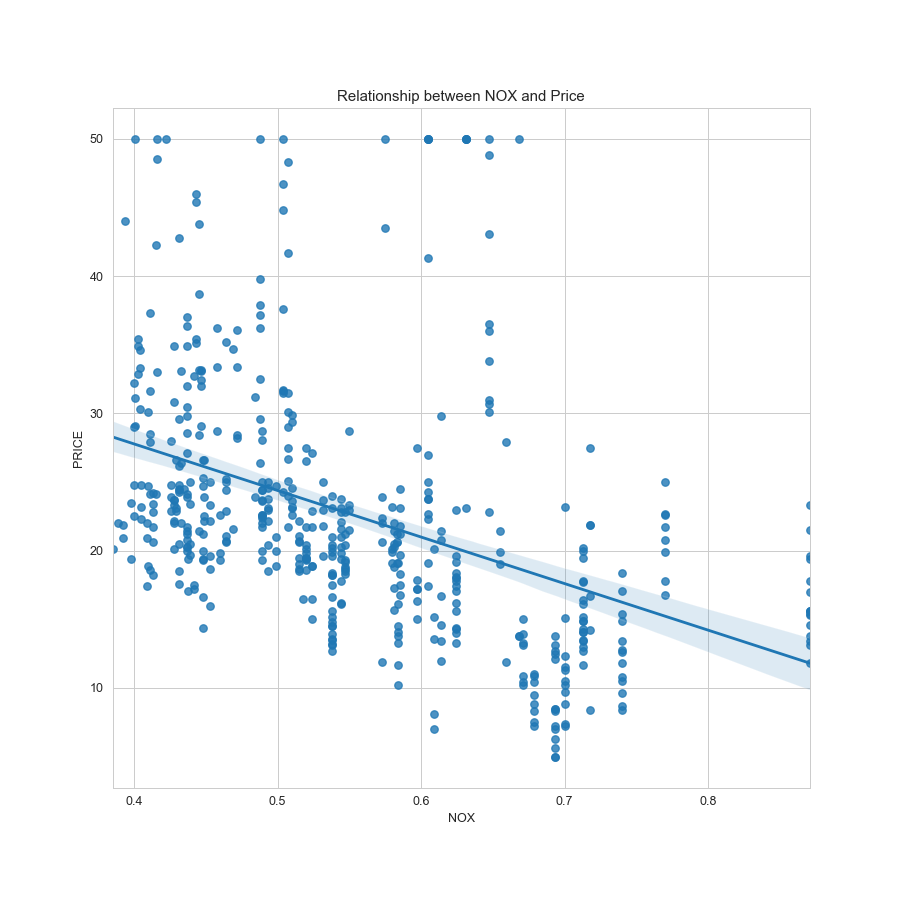

Text(0.5, 1.0, 'Relationship between NOX and Price')

In [16]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.regplot(y="PRICE", x="NOX", data=bos, fit_reg = True)
plt.title("Relationship between NOX and Price")

#### Weighted Distance from 5 Major Employment Centers
Strong positive coorelation, the closer/further the town is from employment centers, the higher/lower the housing price.

<IPython.core.display.Javascript object>


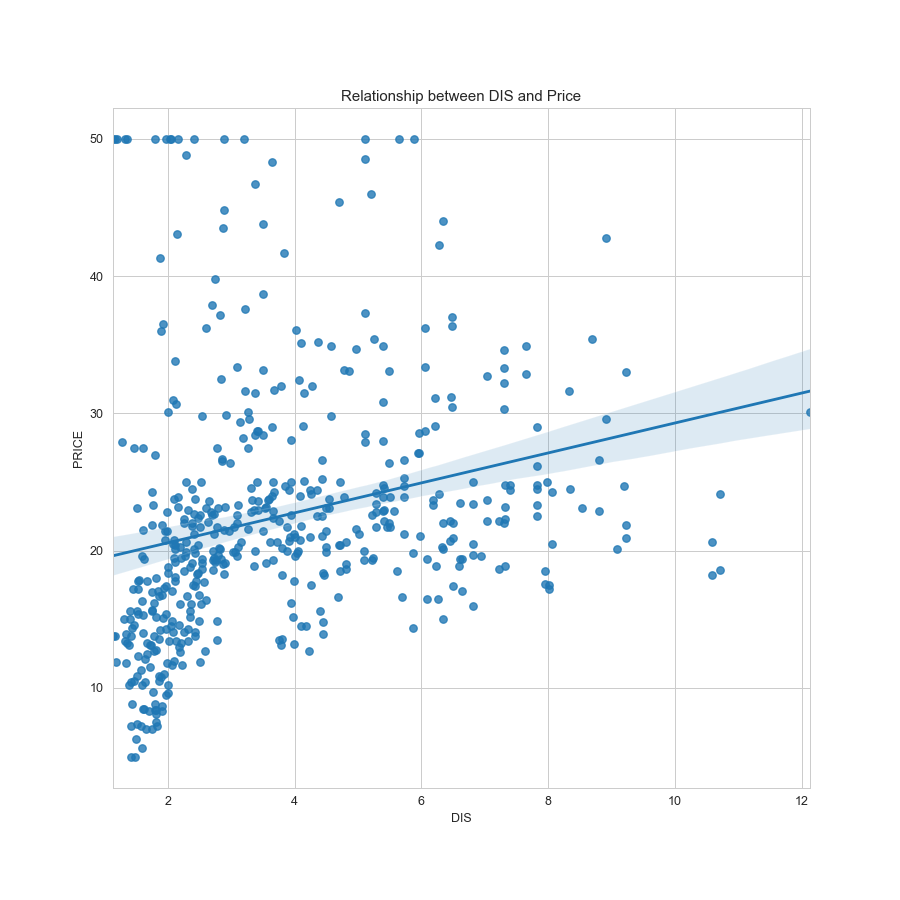

Text(0.5, 1.0, 'Relationship between DIS and Price')

In [17]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.regplot(y="PRICE", x="DIS", data=bos, fit_reg = True)
plt.title("Relationship between DIS and Price")

### Weaker (still decent) Possible Predictors:
These features have string relationships to price exemplified by a small, tight distribution of data around the line of best fit extimated by the plot.

#### Pupil Teacher Ratio
As the number of students increases for every teacher, the value of housing decreases.

<IPython.core.display.Javascript object>


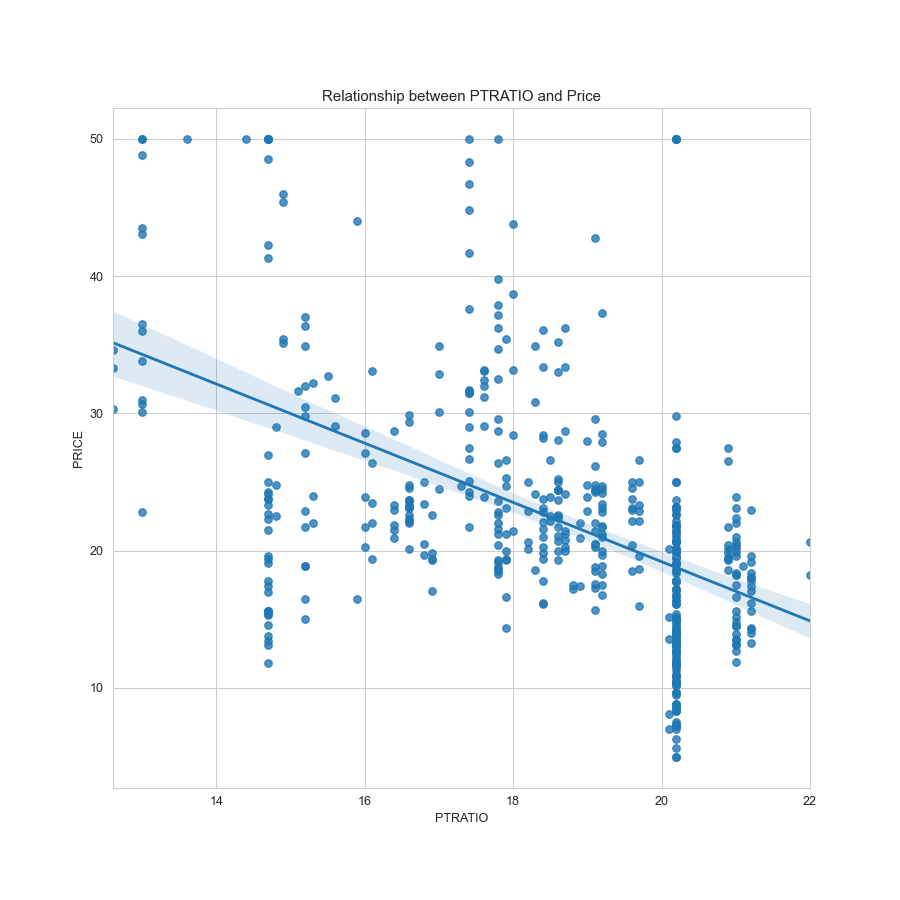

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

In [18]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.regplot(y="PRICE", x="PTRATIO", data=bos, fit_reg = True)
plt.title("Relationship between PTRATIO and Price")

#### Crime Rate
As them crime rate decreases/increases, the housing price increases/decreases.

<IPython.core.display.Javascript object>


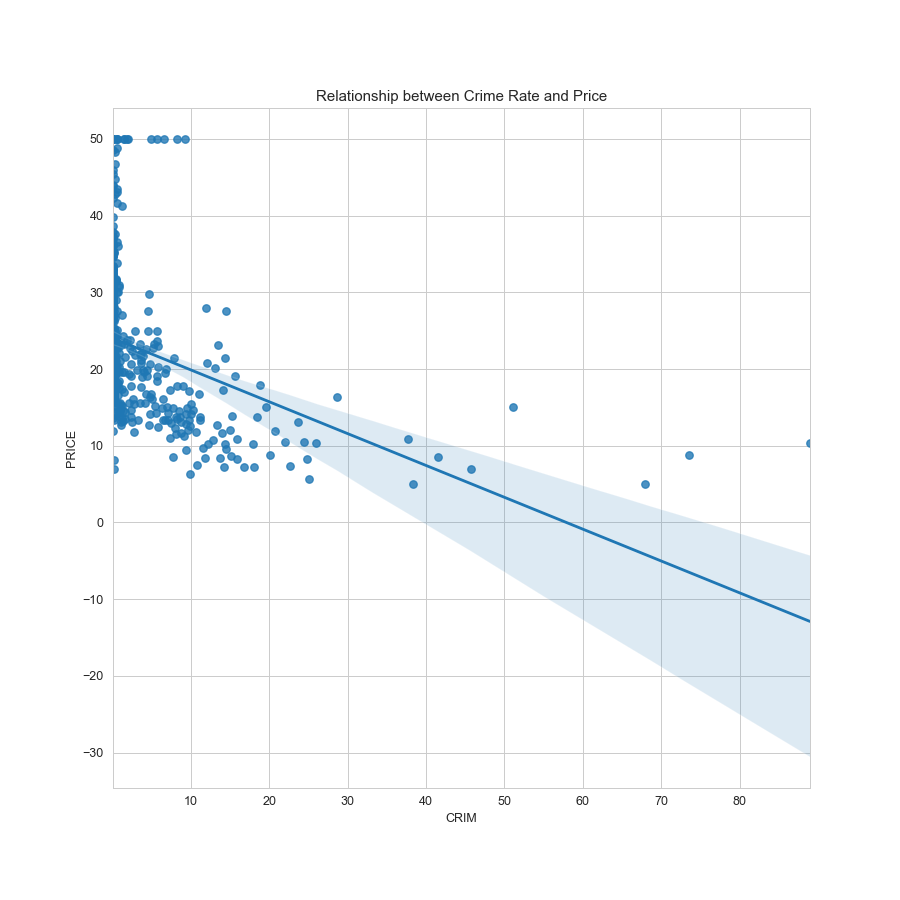

Text(0.5, 1.0, 'Relationship between Crime Rate and Price')

In [19]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.regplot(y="PRICE", x="CRIM", data=bos, fit_reg = True)
plt.title("Relationship between Crime Rate and Price")

***
## Step 2: Checking for Normality: Histograms
***
#### Now we have some possible variables that we can use to predict price. The next assumption we must check is that the values are normally distributed, if they are not we will transform the data so that it is. 

Taking the log of the data helps to normalize the data and eliminate any skew in the distribution to make patterns more visible and data more interprettable. 

#### Adjusting the Crime Rate Feature

When we look at our Crime Rate and Price graph, we see it exhibits exponential decay. This can be coorected by taking it's log so that it has a linear relationship with price. 

<IPython.core.display.Javascript object>


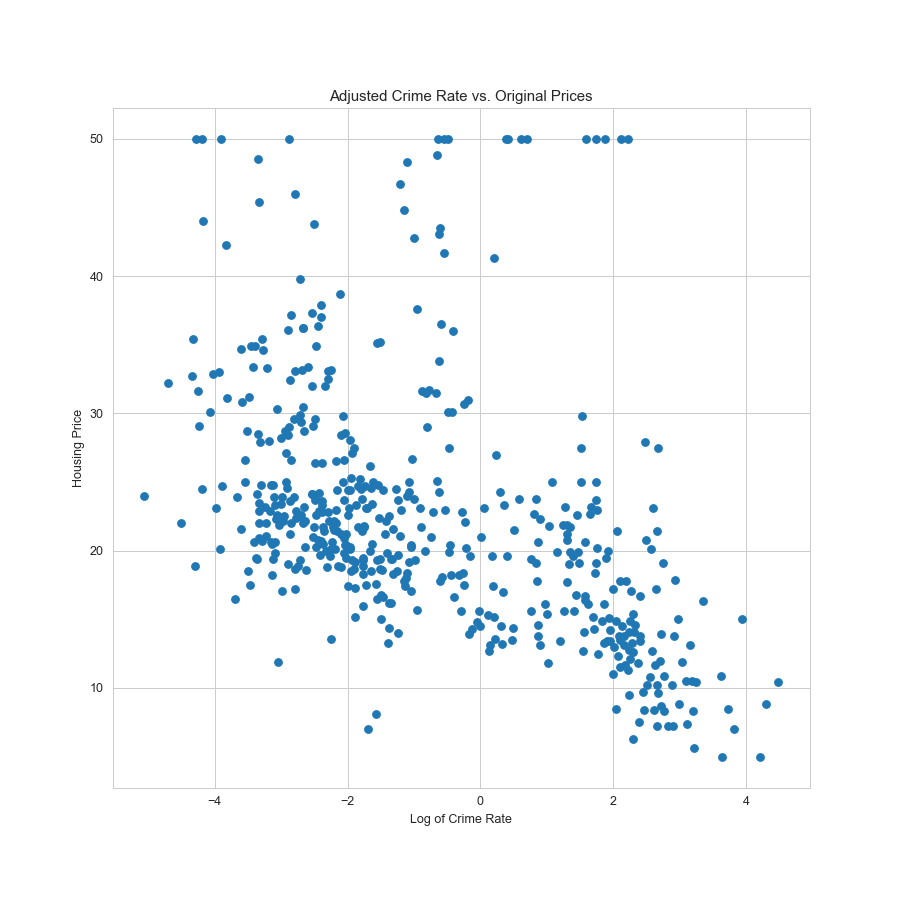

Text(0.5, 1.0, 'Adjusted Crime Rate vs. Original Prices')

In [20]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

x = np.log(bos.CRIM)
plt.scatter(x, bos.PRICE)

plt.xlabel("Log of Crime Rate")
plt.ylabel("Housing Price")
plt.title("Adjusted Crime Rate vs. Original Prices")

#### Crime Rate now has a normal distribution:

<IPython.core.display.Javascript object>


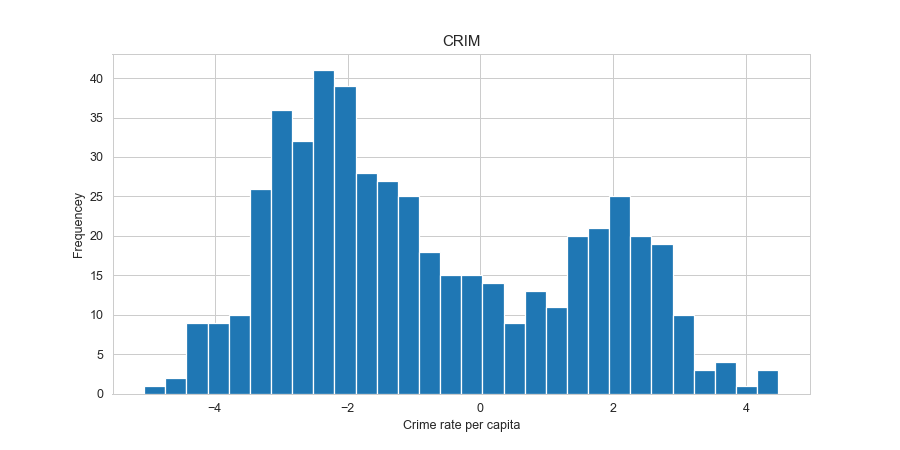

In [21]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.hist(np.log(bos.CRIM),bins=30)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<IPython.core.display.Javascript object>


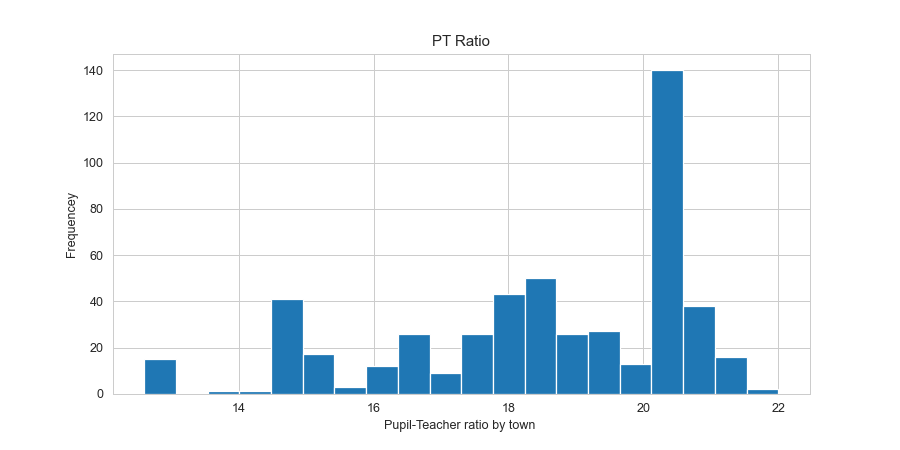

In [22]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.hist(bos.PTRATIO,bins=20)
plt.title("PT Ratio")
plt.xlabel("Pupil-Teacher ratio by town ")
plt.ylabel("Frequencey")
plt.show()

<IPython.core.display.Javascript object>


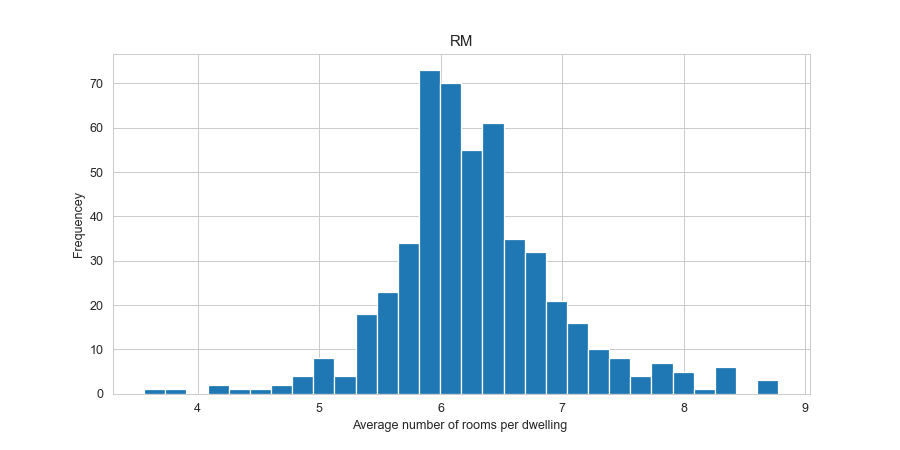

In [23]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.hist(bos.RM,bins=30)
plt.title("RM")
plt.xlabel("Average number of rooms per dwelling ")
plt.ylabel("Frequencey")
plt.show()

<IPython.core.display.Javascript object>


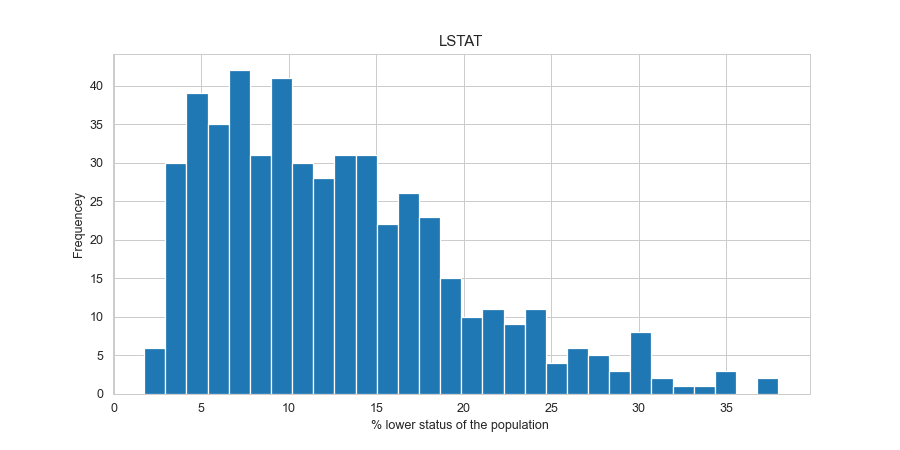

In [24]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.hist(bos.LSTAT,bins=30)
plt.title("LSTAT")
plt.xlabel("% lower status of the population ")
plt.ylabel("Frequencey")
plt.show()

<IPython.core.display.Javascript object>


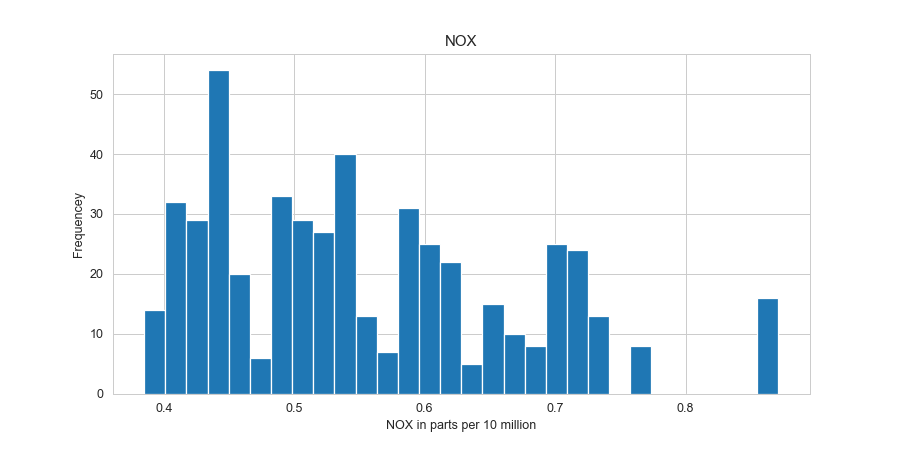

In [25]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.hist(bos.NOX,bins=30)
plt.title("NOX")
plt.xlabel("NOX in parts per 10 million")
plt.ylabel("Frequencey")
plt.show()

# Fitting Linear Regression using `statsmodels`

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
bos1 = bos
bos1['CRIM'] = np.log(bos1['CRIM'])

In [28]:
m = ols('PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT ', bos1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     105.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          4.82e-133
Time:                        20:27:08   Log-Likelihood:                -1503.2
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     492   BIC:                             3094.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.7290      5.222      7.033      0.0

In [29]:
m = ols('PRICE ~ PTRATIO + CRIM + NOX + RM + LSTAT + DIS ',bos1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          2.90e-130
Time:                        20:27:08   Log-Likelihood:                -1528.0
No. Observations:                 506   AIC:                             3070.
Df Residuals:                     499   BIC:                             3100.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.4341      5.207      7.765      0.0

In [30]:
m = ols('PRICE ~ PTRATIO + NOX + RM + LSTAT + DIS ',bos1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          3.67e-131
Time:                        20:27:08   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

In [31]:
m = ols('PRICE ~ CRIM + NOX + RM + LSTAT + DIS ',bos1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     194.7
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          7.34e-115
Time:                        20:27:08   Log-Likelihood:                -1566.8
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     500   BIC:                             3171.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4260      4.247      2.220      0.0

In [32]:
m = ols('PRICE ~ NOX + RM + LSTAT + DIS ',bos1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     241.6
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          2.09e-115
Time:                        20:27:08   Log-Likelihood:                -1568.4
No. Observations:                 506   AIC:                             3147.
Df Residuals:                     501   BIC:                             3168.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0360      3.990      3.016      0.0